In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:08<00:00, 22.7MB/s]
100% 163M/163M [00:08<00:00, 19.8MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  sample_data


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1711.jpg', 'with_mask_1590.jpg', 'with_mask_1102.jpg', 'with_mask_1.jpg', 'with_mask_583.jpg']
['with_mask_3229.jpg', 'with_mask_2999.jpg', 'with_mask_464.jpg', 'with_mask_1844.jpg', 'with_mask_3165.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_616.jpg', 'without_mask_3298.jpg', 'without_mask_2667.jpg', 'without_mask_3657.jpg', 'without_mask_943.jpg']
['without_mask_3779.jpg', 'without_mask_3262.jpg', 'without_mask_170.jpg', 'without_mask_3381.jpg', 'without_mask_2353.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels=[0] * len(without_mask_files)

In [10]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [11]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


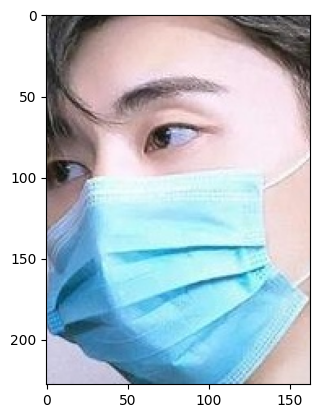

In [16]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

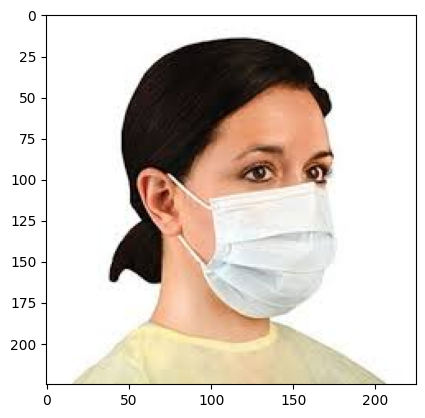

In [20]:
img = mpimg.imread('/content/data/with_mask/with_mask_2315.jpg')
imgplot = plt.imshow(img)
plt.show()

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

array([[[ 65,  65,  67],
        [ 62,  62,  64],
        [ 60,  60,  62],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[ 64,  64,  66],
        [ 61,  61,  63],
        [ 58,  58,  60],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[ 61,  61,  63],
        [ 58,  58,  60],
        [ 55,  55,  57],
        ...,
        [ 13,  13,  13],
        [ 13,  13,  13],
        [ 14,  14,  14]],

       ...,

       [[197, 162, 147],
        [177, 145, 131],
        [147, 118, 105],
        ...,
        [ 97,  87,  73],
        [105,  95,  80],
        [119, 109,  94]],

       [[207, 170, 154],
        [196, 162, 147],
        [171, 140, 127],
        ...,
        [102,  90,  76],
        [113, 101,  87],
        [131, 119, 105]],

       [[203, 167, 151],
        [200, 166, 151],
        [185, 154, 140],
        ...,
        [102,  90,  76],
        [115, 103,  89],
        [136, 124, 110]]], dtype=uint8)
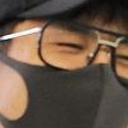

In [23]:
data[0]

In [24]:
X = np.array(data)
y = np.array(labels)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [32]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 27ms/step - loss: 0.5256 - acc: 0.7695 - val_loss: 0.3094 - val_acc: 0.8694
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2983 - acc: 0.8790 - val_loss: 0.2450 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2676 - acc: 0.8955 - val_loss: 0.2365 - val_acc: 0.9174
Epoch 4/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2064 - acc: 0.9183 - val_loss: 0.2544 - val_acc: 0.8992
Epoch 5/5
170/170 [==============================] - 4s 22ms/step - loss: 0.1837 - acc: 0.9318 - val_loss: 0.2147 - val_acc: 0.9273


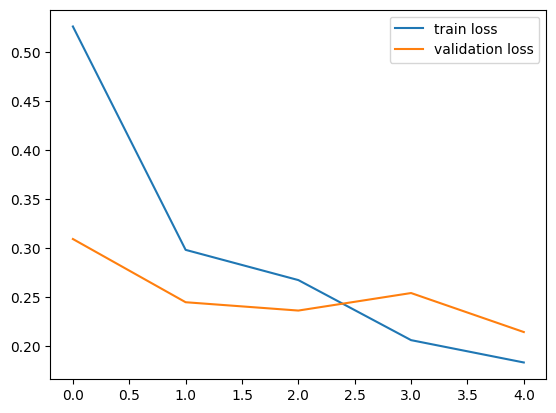

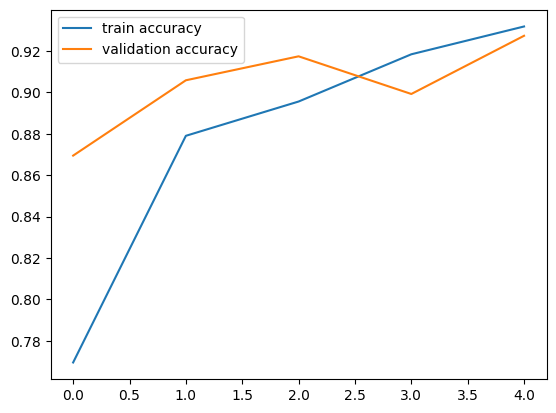

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/picture.jpg


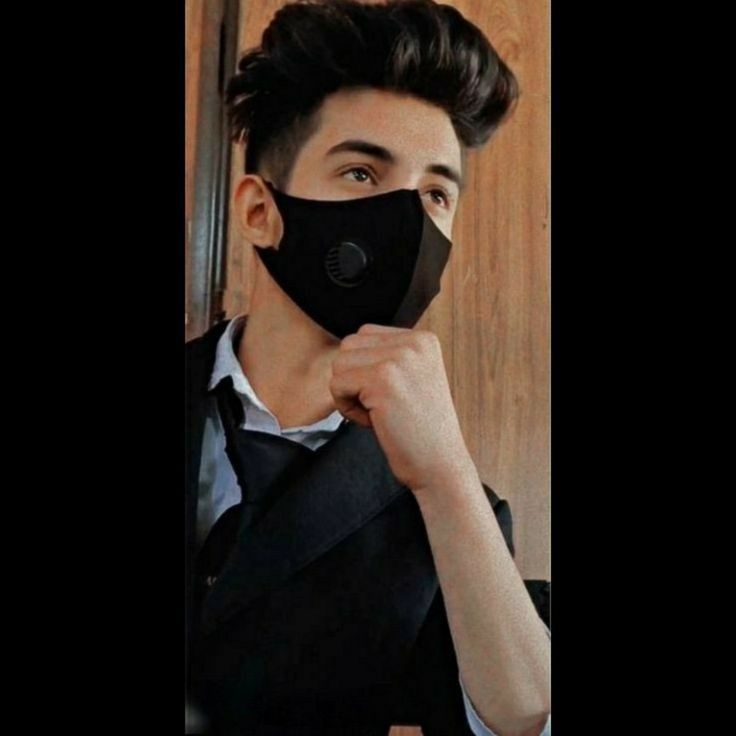

1/1 [==============================] - 0s 407ms/step
[[0.21728173 0.790481  ]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
